In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load dataset
df=pd.read_csv('flight.csv', index_col=[0], parse_dates=['Booking_date','Journey_date'])

In [3]:
# Dataset random sample
df.sample(5)

,From,To,Booking_date,Journey_date,Airline,Code,Departure,Arrival,Duration,Stops,Price
3851,Bangalore,Delhi,2022-06-24,2022-06-25,Vistara,UK-846,08:30,16:20,07h 50m,2+-stop,"16,658"
3726,Bangalore,Delhi,2022-06-24,2022-06-25,GO FIRST,G8- 399,22:15,08:00,09h 45m,1-stop,"9,679"
6639,Kolkata,Bangalore,2022-06-24,2022-06-30,Indigo,6E- 512,13:20,20:25,07h 05m,1-stop,"9,447"
6732,Bangalore,kolkata,2022-06-24,2022-06-24,AirAsia,I5-992,23:30,02:05,02h 35m,non-stop,"8,839"
1083,Delhi,Mumbai,2022-06-23,2022-06-23,IndiGo,6E-6261,19:45,21:55,2h 10m,non-stop,"₹8,789"


In [4]:
df.shape

(7548, 11)

In [5]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

From
Delhi        2858
Bangalore    1867
Mumbai       1268
Goa           814
Kolkata       741
Name: count, dtype: int64


To
Delhi        3131
Bangalore    1815
Mumbai        939
Goa           845
kolkata       818
Name: count, dtype: int64


Booking_date
2022-06-24    5535
2022-06-23    2013
Name: count, dtype: int64


Journey_date
2022-06-26    1238
2022-06-25    1229
2022-06-30    1166
2022-06-29    1160
2022-06-28    1151
2022-06-27    1140
2022-06-24     408
2022-06-23      56
Name: count, dtype: int64


Airline
Vistara      2553
Air India    1446
Indigo       1426
SpiceJet      721
GO FIRST      691
IndiGo        330
AirAsia       294
Air Asia       87
Name: count, dtype: int64


Code
UK-842     96
AI-697     72
UK-852     69
AI-610     64
AI-640     60
           ..
UK-892      1
6E-2112     1
AI-749      1
I5-1532     1
I5-1782     1
Name: count, Length: 700, dtype: int64


Departure
13:20    134
09:30    131
17:35    124
10:15    114
21:15    109
        ... 
02:00      2
01:

In [6]:
df.isnull().sum() # target feature have some Null values, so better to ignore those records

From               0
To                 0
Booking_date       0
Journey_date       0
Airline            0
Code               0
Departure          0
Arrival            0
Duration           0
Stops              0
Price           1486
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape


(6062, 11)

# Feature Preprocessing on features

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6062 entries, 0 to 7547
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   From          6062 non-null   object        
 1   To            6062 non-null   object        
 2   Booking_date  6062 non-null   datetime64[ns]
 3   Journey_date  6062 non-null   datetime64[ns]
 4   Airline       6062 non-null   object        
 5   Code          6062 non-null   object        
 6   Departure     6062 non-null   object        
 7   Arrival       6062 non-null   object        
 8   Duration      6062 non-null   object        
 9   Stops         6062 non-null   object        
 10  Price         6062 non-null   object        
dtypes: datetime64[ns](2), object(9)
memory usage: 568.3+ KB


In [10]:
df.head(2)

,From,To,Booking_date,Journey_date,Airline,Code,Departure,Arrival,Duration,Stops,Price
0,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-504,21:15,00:05\n+1D,2h 50m,non-stop,"₹9,420"
1,Delhi,Bangalore,2022-06-23,2022-06-23,IndiGo,6E-2131,21:30,00:15\n+1D,2h 45m,non-stop,"₹9,419"


In [11]:
df.groupby(['Airline','Code'])['Code'].count()

Airline   Code   
Air Asia  I5-1529     4
          I5-1732    10
          I5-549      8
          I5-552     14
          I5-710      1
                     ..
Vistara   UK-993     56
          UK-994      6
          UK-995     48
          UK-996      6
          UK-997      1
Name: Code, Length: 632, dtype: int64

In [12]:
# We are arrangine the flight in between cities

In [13]:
df['Traveling_cities']= df['From']+'-'+df['To']

In [14]:
df['Traveling_cities'].value_counts()

Traveling_cities
Delhi-Bangalore      1074
Delhi-Mumbai          939
Mumbai-Delhi          885
Bangalore-Delhi       776
Bangalore-kolkata     646
Kolkata-Bangalore     590
Delhi-Goa             588
Goa-Delhi             564
Name: count, dtype: int64

In [15]:
df['Traveling_cities']=df['Traveling_cities'].replace('Bangalore-Delhi','Delhi-Bangalore')
df['Traveling_cities']=df['Traveling_cities'].replace('Mumbai-Delhi','Delhi-Mumbai')
df['Traveling_cities']=df['Traveling_cities'].replace('Kolkata-Bangalore','Bangalore-kolkata')
df['Traveling_cities']=df['Traveling_cities'].replace('Goa-Delhi','Delhi-Goa')


In [16]:
df['Traveling_cities'].value_counts()

Traveling_cities
Delhi-Bangalore      1850
Delhi-Mumbai         1824
Bangalore-kolkata    1236
Delhi-Goa            1152
Name: count, dtype: int64

In [17]:
# Create new column with hoe many days early we booked ticket because it has been seen the early you book ticket, the cheaper you get
# Last minute ticket is always expensive

In [18]:
df['Early_booking']=df['Journey_date'].dt.day-  df['Booking_date'].dt.day

In [19]:
df.head(2)

,From,To,Booking_date,Journey_date,Airline,Code,Departure,Arrival,Duration,Stops,Price,Traveling_cities,Early_booking
0,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-504,21:15,00:05\n+1D,2h 50m,non-stop,"₹9,420",Delhi-Bangalore,0
1,Delhi,Bangalore,2022-06-23,2022-06-23,IndiGo,6E-2131,21:30,00:15\n+1D,2h 45m,non-stop,"₹9,419",Delhi-Bangalore,0


In [20]:
df['Airline'].unique()

array(['Air India', 'IndiGo', 'Vistara', 'GO FIRST', 'SpiceJet',
       'Air Asia', 'Indigo', 'AirAsia'], dtype=object)

In [21]:
df['Airline']=df['Airline'].replace('Air Asia','AirAsia')
df['Airline']=df['Airline'].replace('Indigo','IndiGo')

In [22]:
df['Airline'].unique()

array(['Air India', 'IndiGo', 'Vistara', 'GO FIRST', 'SpiceJet',
       'AirAsia'], dtype=object)

In [23]:
df['Departure'].dtype

dtype('O')

In [24]:
# convert Departure column into datetime to extract hour

df['Departure']=pd.to_datetime(df['Departure']).dt.hour  # minute is not required as we will divide day into zones

In [25]:
df['Arrival'].str.split('\n')

0       [00:05, +1D]
1       [00:15, +1D]
2       [01:45, +1D]
3       [07:50, +1D]
4       [18:20, +1D]
            ...     
7543         [19:35]
7544         [18:05]
7545         [19:35]
7546         [22:45]
7547         [12:05]
Name: Arrival, Length: 6062, dtype: object

In [26]:
arrival=list(df['Arrival'])

In [27]:
for i in range(len(arrival)):
    if len(arrival[i].split('\n'))==2:
        arrival[i]=arrival[i].split('\n')[0]
    else:
        arrival[i]= arrival[i]

In [28]:
len(arrival)

6062

In [29]:
df['Arrival']= arrival

In [30]:
df.head()

,From,To,Booking_date,Journey_date,Airline,Code,Departure,Arrival,Duration,Stops,Price,Traveling_cities,Early_booking
0,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-504,21,00:05,2h 50m,non-stop,"₹9,420",Delhi-Bangalore,0
1,Delhi,Bangalore,2022-06-23,2022-06-23,IndiGo,6E-2131,21,00:15,2h 45m,non-stop,"₹9,419",Delhi-Bangalore,0
2,Delhi,Bangalore,2022-06-23,2022-06-23,IndiGo,6E-6565,22,01:45,2h 50m,non-stop,"₹9,419",Delhi-Bangalore,0
3,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-605,21,07:50,10h 35m,1 stop,"₹14,775",Delhi-Bangalore,0
4,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-605,21,18:20,21h 5m,1 stop,"₹14,985",Delhi-Bangalore,0


In [31]:
df['Arrival']=pd.to_datetime(df['Arrival']).dt.hour

In [32]:
df.head(2)

,From,To,Booking_date,Journey_date,Airline,Code,Departure,Arrival,Duration,Stops,Price,Traveling_cities,Early_booking
0,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-504,21,0,2h 50m,non-stop,"₹9,420",Delhi-Bangalore,0
1,Delhi,Bangalore,2022-06-23,2022-06-23,IndiGo,6E-2131,21,0,2h 45m,non-stop,"₹9,419",Delhi-Bangalore,0


In [33]:
bins=[-1,5,11,16,19,22,24]
depart=['Early_morning_departure','morning_departure','afternoon_departure','evening_departure','night_departure','late_night_departure']
arri=['Early_morning_arrival','morning_arrival','afternoon_arrival','evening_arrival','night_arrival','late_night_arrival']

In [34]:
df['Departure']=pd.cut(df['Departure'],bins,labels=depart)
df['Arrival']=pd.cut(df['Arrival'],bins,labels=arri)

In [35]:
df.head()

,From,To,Booking_date,Journey_date,Airline,Code,Departure,Arrival,Duration,Stops,Price,Traveling_cities,Early_booking
0,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-504,night_departure,Early_morning_arrival,2h 50m,non-stop,"₹9,420",Delhi-Bangalore,0
1,Delhi,Bangalore,2022-06-23,2022-06-23,IndiGo,6E-2131,night_departure,Early_morning_arrival,2h 45m,non-stop,"₹9,419",Delhi-Bangalore,0
2,Delhi,Bangalore,2022-06-23,2022-06-23,IndiGo,6E-6565,night_departure,Early_morning_arrival,2h 50m,non-stop,"₹9,419",Delhi-Bangalore,0
3,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-605,night_departure,morning_arrival,10h 35m,1 stop,"₹14,775",Delhi-Bangalore,0
4,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-605,night_departure,evening_arrival,21h 5m,1 stop,"₹14,985",Delhi-Bangalore,0


In [36]:
# we have duration in hours and minutes, lets convert complete feature in minutes

df['Duration'].str.split(' ')

0        [2h, 50m]
1        [2h, 45m]
2        [2h, 50m]
3       [10h, 35m]
4        [21h, 5m]
           ...    
7543    [08h, 05m]
7544    [08h, 20m]
7545    [09h, 50m]
7546    [11h, 15m]
7547    [06h, 55m]
Name: Duration, Length: 6062, dtype: object

In [37]:
duration=list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m"
        else:
            duration[i]=  "0h "  + duration[i]
            
duration_hours=[]
duration_minutes=[]

for  i in range(len(duration)):
    duration_hours.append(int(duration[i].split("h")[0]))
    duration_minutes.append(int(duration[i].split("m")[0].split()[-1]))
    

df["duration_hours"]=duration_hours
df["duration_minutes"]=duration_minutes

In [38]:
df.head()

,From,To,Booking_date,Journey_date,Airline,Code,Departure,Arrival,Duration,Stops,Price,Traveling_cities,Early_booking,duration_hours,duration_minutes
0,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-504,night_departure,Early_morning_arrival,2h 50m,non-stop,"₹9,420",Delhi-Bangalore,0,2,50
1,Delhi,Bangalore,2022-06-23,2022-06-23,IndiGo,6E-2131,night_departure,Early_morning_arrival,2h 45m,non-stop,"₹9,419",Delhi-Bangalore,0,2,45
2,Delhi,Bangalore,2022-06-23,2022-06-23,IndiGo,6E-6565,night_departure,Early_morning_arrival,2h 50m,non-stop,"₹9,419",Delhi-Bangalore,0,2,50
3,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-605,night_departure,morning_arrival,10h 35m,1 stop,"₹14,775",Delhi-Bangalore,0,10,35
4,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-605,night_departure,evening_arrival,21h 5m,1 stop,"₹14,985",Delhi-Bangalore,0,21,5


In [39]:
# Total time travel in hours

df["total_travel_time"]=np.round((df["duration_minutes"]/60)+ df["duration_hours"],2)

In [40]:
df.head()

,From,To,Booking_date,Journey_date,Airline,Code,Departure,Arrival,Duration,Stops,Price,Traveling_cities,Early_booking,duration_hours,duration_minutes,total_travel_time
0,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-504,night_departure,Early_morning_arrival,2h 50m,non-stop,"₹9,420",Delhi-Bangalore,0,2,50,2.83
1,Delhi,Bangalore,2022-06-23,2022-06-23,IndiGo,6E-2131,night_departure,Early_morning_arrival,2h 45m,non-stop,"₹9,419",Delhi-Bangalore,0,2,45,2.75
2,Delhi,Bangalore,2022-06-23,2022-06-23,IndiGo,6E-6565,night_departure,Early_morning_arrival,2h 50m,non-stop,"₹9,419",Delhi-Bangalore,0,2,50,2.83
3,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-605,night_departure,morning_arrival,10h 35m,1 stop,"₹14,775",Delhi-Bangalore,0,10,35,10.58
4,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-605,night_departure,evening_arrival,21h 5m,1 stop,"₹14,985",Delhi-Bangalore,0,21,5,21.08


In [41]:
df['Stops'].unique()

array(['non-stop', '1 stop', '2 stops', '1-stop', '2+-stop',
       '1-stop Via Mumbai'], dtype=object)

In [42]:
dic={'non-stop':0,'1 stop':1,'1-stop':1,'1-stop Via Mumbai':1,'2 stops':2,'2+-stop':2}

In [43]:
df['Stops']=df['Stops'].map(dic)

## Dependent feature- Price

In [44]:
df['Price']=df['Price'].str.replace("₹","")
df['Price']=df['Price'].str.replace(",","")
df['Price']=df['Price'].astype(int)

In [45]:
df.head()

,From,To,Booking_date,Journey_date,Airline,Code,Departure,Arrival,Duration,Stops,Price,Traveling_cities,Early_booking,duration_hours,duration_minutes,total_travel_time
0,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-504,night_departure,Early_morning_arrival,2h 50m,0,9420,Delhi-Bangalore,0,2,50,2.83
1,Delhi,Bangalore,2022-06-23,2022-06-23,IndiGo,6E-2131,night_departure,Early_morning_arrival,2h 45m,0,9419,Delhi-Bangalore,0,2,45,2.75
2,Delhi,Bangalore,2022-06-23,2022-06-23,IndiGo,6E-6565,night_departure,Early_morning_arrival,2h 50m,0,9419,Delhi-Bangalore,0,2,50,2.83
3,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-605,night_departure,morning_arrival,10h 35m,1,14775,Delhi-Bangalore,0,10,35,10.58
4,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-605,night_departure,evening_arrival,21h 5m,1,14985,Delhi-Bangalore,0,21,5,21.08


In [46]:
# We have calculated total travel duration so we donot require Duration, duration_hours and duration_minutes
df=df.drop(['Duration','duration_hours','duration_minutes'], axis=1)

In [47]:
df.head()

,From,To,Booking_date,Journey_date,Airline,Code,Departure,Arrival,Stops,Price,Traveling_cities,Early_booking,total_travel_time
0,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-504,night_departure,Early_morning_arrival,0,9420,Delhi-Bangalore,0,2.83
1,Delhi,Bangalore,2022-06-23,2022-06-23,IndiGo,6E-2131,night_departure,Early_morning_arrival,0,9419,Delhi-Bangalore,0,2.75
2,Delhi,Bangalore,2022-06-23,2022-06-23,IndiGo,6E-6565,night_departure,Early_morning_arrival,0,9419,Delhi-Bangalore,0,2.83
3,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-605,night_departure,morning_arrival,1,14775,Delhi-Bangalore,0,10.58
4,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-605,night_departure,evening_arrival,1,14985,Delhi-Bangalore,0,21.08


## Lets Analyse the Data

In [48]:
df.shape

(6062, 13)

In [49]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Booking_date,6062,2022-06-23 16:01:49.270867712,2022-06-23 00:00:00,2022-06-23 00:00:00,2022-06-24 00:00:00,2022-06-24 00:00:00,2022-06-24 00:00:00,NaN
Journey_date,6062,2022-06-27 04:32:13.619267584,2022-06-23 00:00:00,2022-06-26 00:00:00,2022-06-27 00:00:00,2022-06-29 00:00:00,2022-06-30 00:00:00,NaN
Stops,6062.0,0.860772,0.0,1.0,1.0,1.0,2.0,0.522153
Price,6062.0,12837.186407,7789.0,9419.0,11800.0,15555.0,47584.0,4256.447984
Early_booking,6062.0,3.521115,0.0,2.0,3.0,5.0,7.0,1.914989
total_travel_time,6062.0,9.550699,1.83,4.75,7.42,12.83,35.5,6.882557


<Axes: >

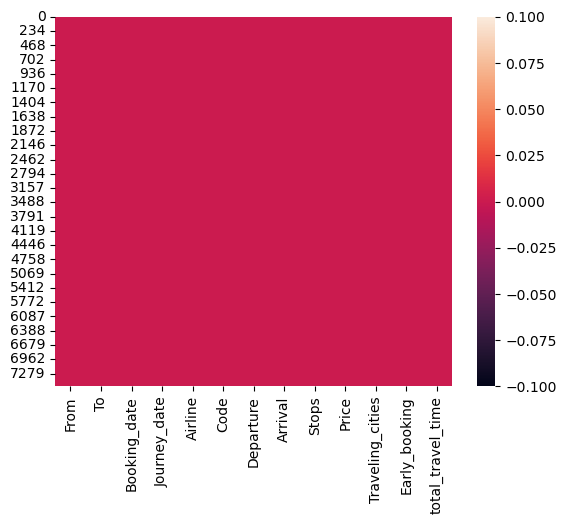

In [50]:
sns.heatmap(df.isnull())

# No Null values

In [51]:
df.sample(1)

,From,To,Booking_date,Journey_date,Airline,Code,Departure,Arrival,Stops,Price,Traveling_cities,Early_booking,total_travel_time
1375,Delhi,Mumbai,2022-06-23,2022-06-25,Air India,AI-485,Early_morning_departure,afternoon_arrival,1,23385,Delhi-Mumbai,2,10.92


In [52]:
df.groupby('From')['Price'].median()

From
Bangalore    12197.0
Delhi        13567.0
Goa          10997.0
Kolkata      12046.0
Mumbai        8883.0
Name: Price, dtype: float64

<Axes: ylabel='From'>

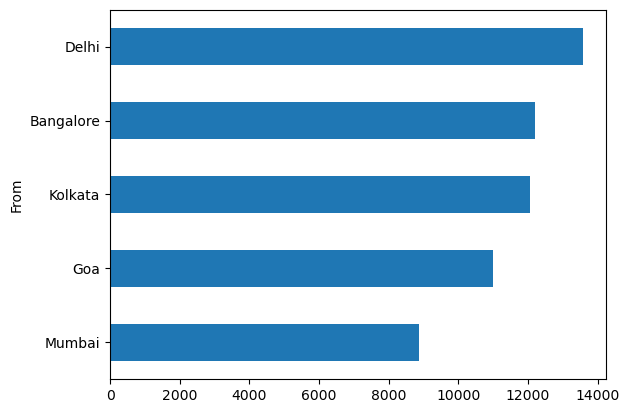

In [53]:
df.groupby('From')['Price'].median().sort_values().plot.barh()

In [54]:


df['Airline'].value_counts()

Airline
Vistara      2553
IndiGo       1756
GO FIRST      691
Air India     458
AirAsia       381
SpiceJet      223
Name: count, dtype: int64

<Axes: xlabel='Airline'>

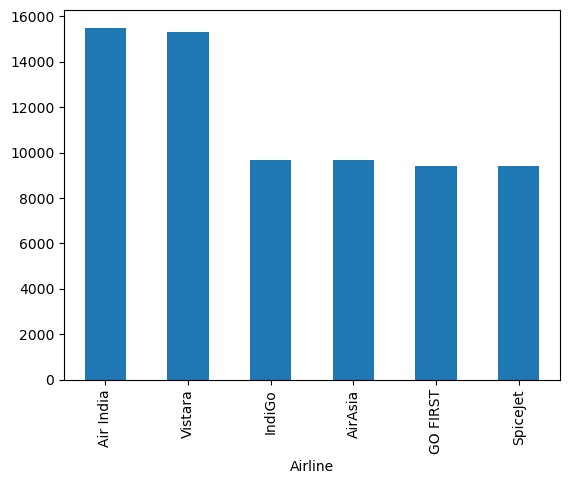

In [55]:
df.groupby('Airline')['Price'].median().sort_values(ascending=False).plot.bar()

In [56]:
df.groupby(['Airline','Code']).size()

Airline    Code  
Air India  AI-401     5
           AI-403     7
           AI-406     7
           AI-407     5
           AI-411     2
                     ..
Vistara    UK-993    56
           UK-994     6
           UK-995    48
           UK-996     6
           UK-997     1
Length: 603, dtype: int64

In [57]:
df.groupby('Airline')['Code'].nunique()

Airline
Air India     45
AirAsia       73
GO FIRST      83
IndiGo       230
SpiceJet      37
Vistara      135
Name: Code, dtype: int64

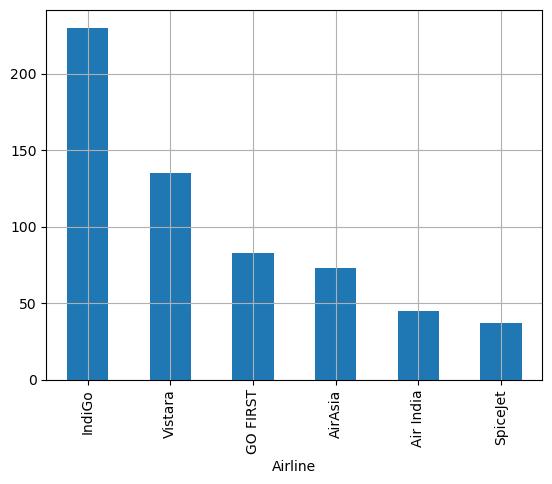

In [58]:

df.groupby('Airline')['Code'].nunique().sort_values(ascending=False).plot.bar()
plt.grid()

In [59]:
df[df['Airline']=='Air India']['Code'].unique()

array(['AI-504', 'AI-605', 'AI-803', 'AI-506', 'AI-807', 'AI-502',
       'AI-865', 'AI-665', 'AI-887', 'AI-636', 'AI-805', 'AI-624',
       'AI-441', 'AI-863', 'AI-883', 'AI-479', 'AI-540', 'AI-762',
       'AI-497', 'AI-469', 'AI-403', 'AI-560', 'AI-415', 'AI-473',
       'AI-406', 'AI-407', 'AI-885', 'AI-451', 'AI-401', 'AI-764',
       'AI-877', 'AI-767', 'AI-839', 'AI-801', 'AI-465', 'AI-425',
       'AI-439', 'AI-542', 'AI-485', 'AI-481', 'AI-621', 'AI-411',
       'AI-544', 'AI-429', 'AI-537'], dtype=object)

In [60]:
df[df['Airline']=='AirAsia']['Code'].unique()

array(['I5-740', 'I5-721', 'I5-1732', 'I5-713', 'I5-711', 'I5-744',
       'I5-552', 'I5-768', 'I5-1529', 'I5-857', 'I5-710', 'I5-773',
       'I5-783', 'I5-549', 'I5-764', 'I5-798', 'I5-753', 'I5-779',
       'I5-472', 'I5-774', 'I5-1455', 'I5-974', 'I5-330', 'I5-776',
       'I5-799', 'I5-315', 'I5-819', 'I5-1427', 'I5-749', 'I5-722',
       'I5-817', 'I5-1453', 'I5-1451', 'I5-1621', 'I5-1981', 'I5-1781',
       'I5-820', 'I5-942', 'I5-592', 'I5-972', 'I5-1622', 'I5-1426',
       'I5-1782', 'I5-612', 'I5-991', 'I5-1562', 'I5-1528', 'I5-1731',
       'I5-1982', 'I5-1780', 'I5-741', 'I5-818', 'I5-1983', 'I5-1569',
       'I5-1784', 'I5-767', 'I5-679', 'I5-631', 'I5-678', 'I5-588',
       'I5-2991', 'I5-1563', 'I5-319', 'I5-510', 'I5-541', 'I5-547',
       'I5-830', 'I5-992', 'I5-1567', 'I5-1532', 'I5-2472', 'I5-611',
       'I5-1576'], dtype=object)

In [61]:
df[df['Airline']=='GO FIRST']['Code'].unique()

array(['G8-113', 'G8-119', 'G8-406', 'G8-338', 'G8-2513', 'G8-165',
       'G8-286', 'G8-336', 'G8-171', 'G8-2501', 'G8-300', 'G8-346',
       'G8-328', 'G8-354', 'G8-530', 'G8-323', 'G8-719', 'G8-190',
       'G8-717', 'G8-213', 'G8-334', 'G8-713', 'G8-131', 'G8-8007',
       'G8-237', 'G8- 354', 'G8- 328', 'G8- 346', 'G8- 338', 'G8- 717',
       'G8- 334', 'G8- 713', 'G8- 323', 'G8- 113', 'G8- 286', 'G8- 300',
       'G8- 914', 'G8- 285', 'G8- 381', 'G8- 372', 'G8- 332', 'G8- 315',
       'G8- 380', 'G8-3022', 'G8- 301', 'G8- 312', 'G8- 116', 'G8- 118',
       'G8- 803', 'G8- 320', 'G8- 399', 'G8- 395', 'G8- 283', 'G8- 873',
       'G8- 241', 'G8- 322', 'G8-2611', 'G8- 329', 'G8- 339', 'G8- 330',
       'G8- 327', 'G8- 391', 'G8- 341', 'G8- 287', 'G8- 383', 'G8-3184',
       'G8- 398', 'G8- 364', 'G8- 344', 'G8- 510', 'G8-2504', 'G8- 575',
       'G8- 331', 'G8- 345', 'G8- 363', 'G8- 351', 'G8- 311', 'G8- 319',
       'G8- 317', 'G8- 520', 'G8- 519', 'G8- 102', 'G8- 393'],
      dtyp

# SOme values have space inbetween, we need to remove that



In [62]:
df[df['Airline']=='IndiGo']['Code'].unique()

array(['6E-2131', '6E-6565', '6E-5036', '6E-2048', '6E-6612', '6E-5009',
       '6E-308', '6E-2003', '6E-2188', '6E-2014', '6E-2187', '6E-2168',
       '6E-5005', '6E-2697', '6E-6187', '6E-6827', '6E-2532', '6E-5186',
       '6E-2004', '6E-2487', '6E-781', '6E-2015', '6E-6191', '6E-2774',
       '6E-2114', '6E-2519', '6E-6261', '6E-153', '6E-5023', '6E-6814',
       '6E-2129', '6E-6278', '6E-5328', '6E-5342', '6E-2138', '6E-2176',
       '6E-5306', '6E-864', '6E-5318', '6E-2017', '6E-7403', '6E-761',
       '6E-2033', '6E-2077', '6E-2141', '6E-6022', '6E-6373', '6E-2009',
       '6E-6939', '6E-184', '6E-2112', '6E- 698', '6E- 505', '6E-2117',
       '6E-2792', '6E-5161', '6E- 153', '6E-2104', '6E-2043', '6E- 864',
       '6E-2143', '6E-6823', '6E-5024', '6E-2144', '6E- 184', '6E-2191',
       '6E- 781', '6E-2331', '6E- 315', '6E-2325', '6E- 308', '6E-2336',
       '6E- 589', '6E-6532', '6E-2332', '6E-2119', '6E-2044', '6E-2183',
       '6E- 744', '6E-6955', '6E- 137', '6E-6097', '6E-62

In [63]:
# Lets remove space from Code feature
df['Code']=df['Code'].str.replace(" ","")

In [64]:
df.groupby('Airline')['Code'].nunique()

Airline
Air India     45
AirAsia       73
GO FIRST      72
IndiGo       225
SpiceJet      35
Vistara      135
Name: Code, dtype: int64

In [65]:
df.head()

,From,To,Booking_date,Journey_date,Airline,Code,Departure,Arrival,Stops,Price,Traveling_cities,Early_booking,total_travel_time
0,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-504,night_departure,Early_morning_arrival,0,9420,Delhi-Bangalore,0,2.83
1,Delhi,Bangalore,2022-06-23,2022-06-23,IndiGo,6E-2131,night_departure,Early_morning_arrival,0,9419,Delhi-Bangalore,0,2.75
2,Delhi,Bangalore,2022-06-23,2022-06-23,IndiGo,6E-6565,night_departure,Early_morning_arrival,0,9419,Delhi-Bangalore,0,2.83
3,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-605,night_departure,morning_arrival,1,14775,Delhi-Bangalore,0,10.58
4,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-605,night_departure,evening_arrival,1,14985,Delhi-Bangalore,0,21.08


### Departure

<Axes: xlabel='count', ylabel='Departure'>

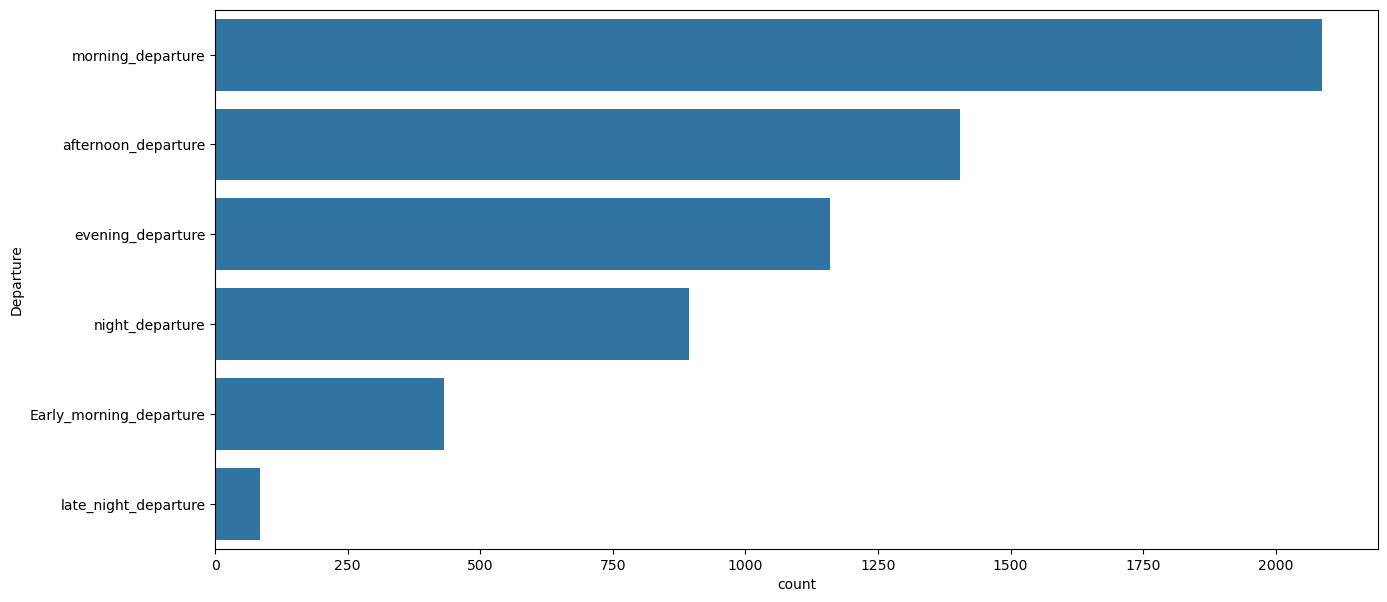

In [66]:
plt.figure(figsize=(15,7))
sns.countplot(df['Departure'], order=df['Departure'].value_counts(ascending=False).index)

In [67]:
df.groupby('Departure')['Price'].mean().sort_values(ascending=False)

Departure
morning_departure          13137.462644
afternoon_departure        13109.740028
night_departure            12791.619687
evening_departure          12769.685073
Early_morning_departure    11417.483796
late_night_departure        9574.129412
Name: Price, dtype: float64

<Axes: xlabel='Departure'>

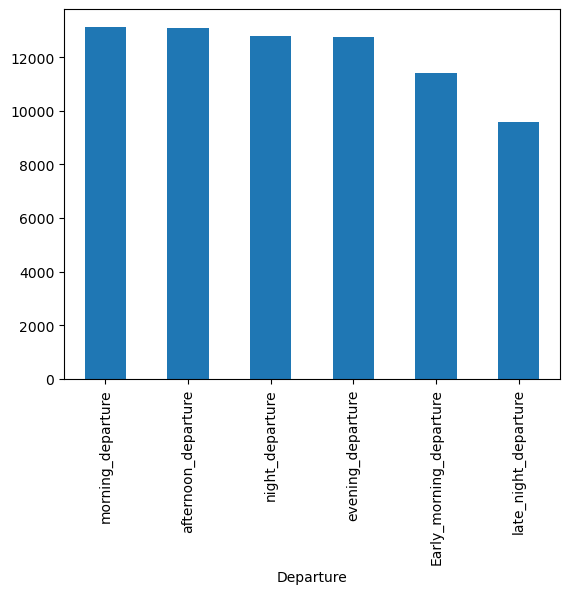

In [68]:
df.groupby('Departure')['Price'].mean().sort_values(ascending=False).plot.bar()

### Arrival

<Axes: xlabel='count', ylabel='Arrival'>

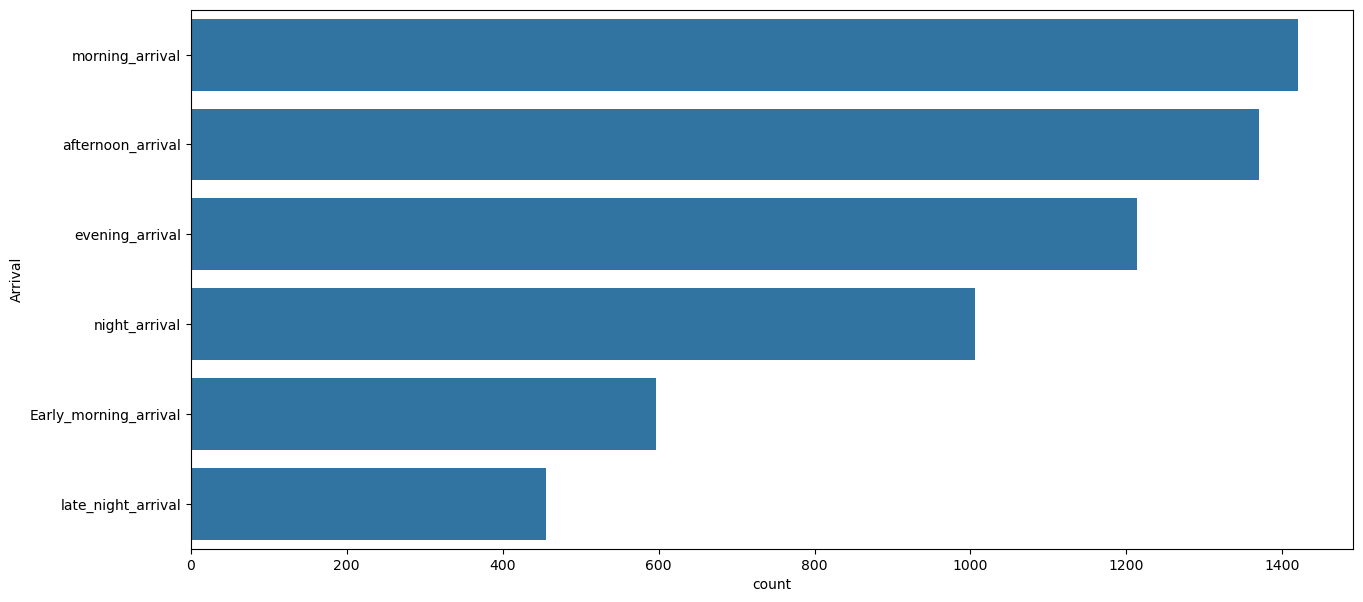

In [69]:
plt.figure(figsize=(15,7))
sns.countplot(df['Arrival'], order=df['Arrival'].value_counts(ascending=False).index)

In [70]:
df.groupby('Arrival')['Price'].mean().sort_values(ascending=False)

Arrival
afternoon_arrival        13599.354745
evening_arrival          13431.309975
night_arrival            12853.918489
morning_arrival          12596.035915
late_night_arrival       12395.048246
Early_morning_arrival    10764.110553
Name: Price, dtype: float64

<Axes: xlabel='Departure'>

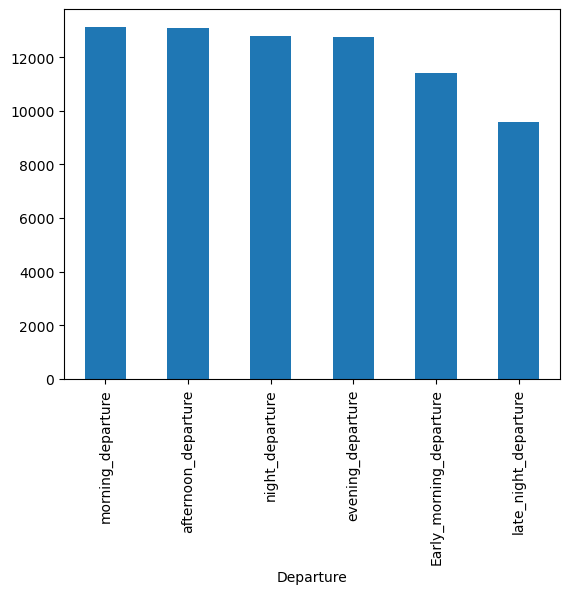

In [71]:
df.groupby('Departure')['Price'].mean().sort_values(ascending=False).plot.bar()

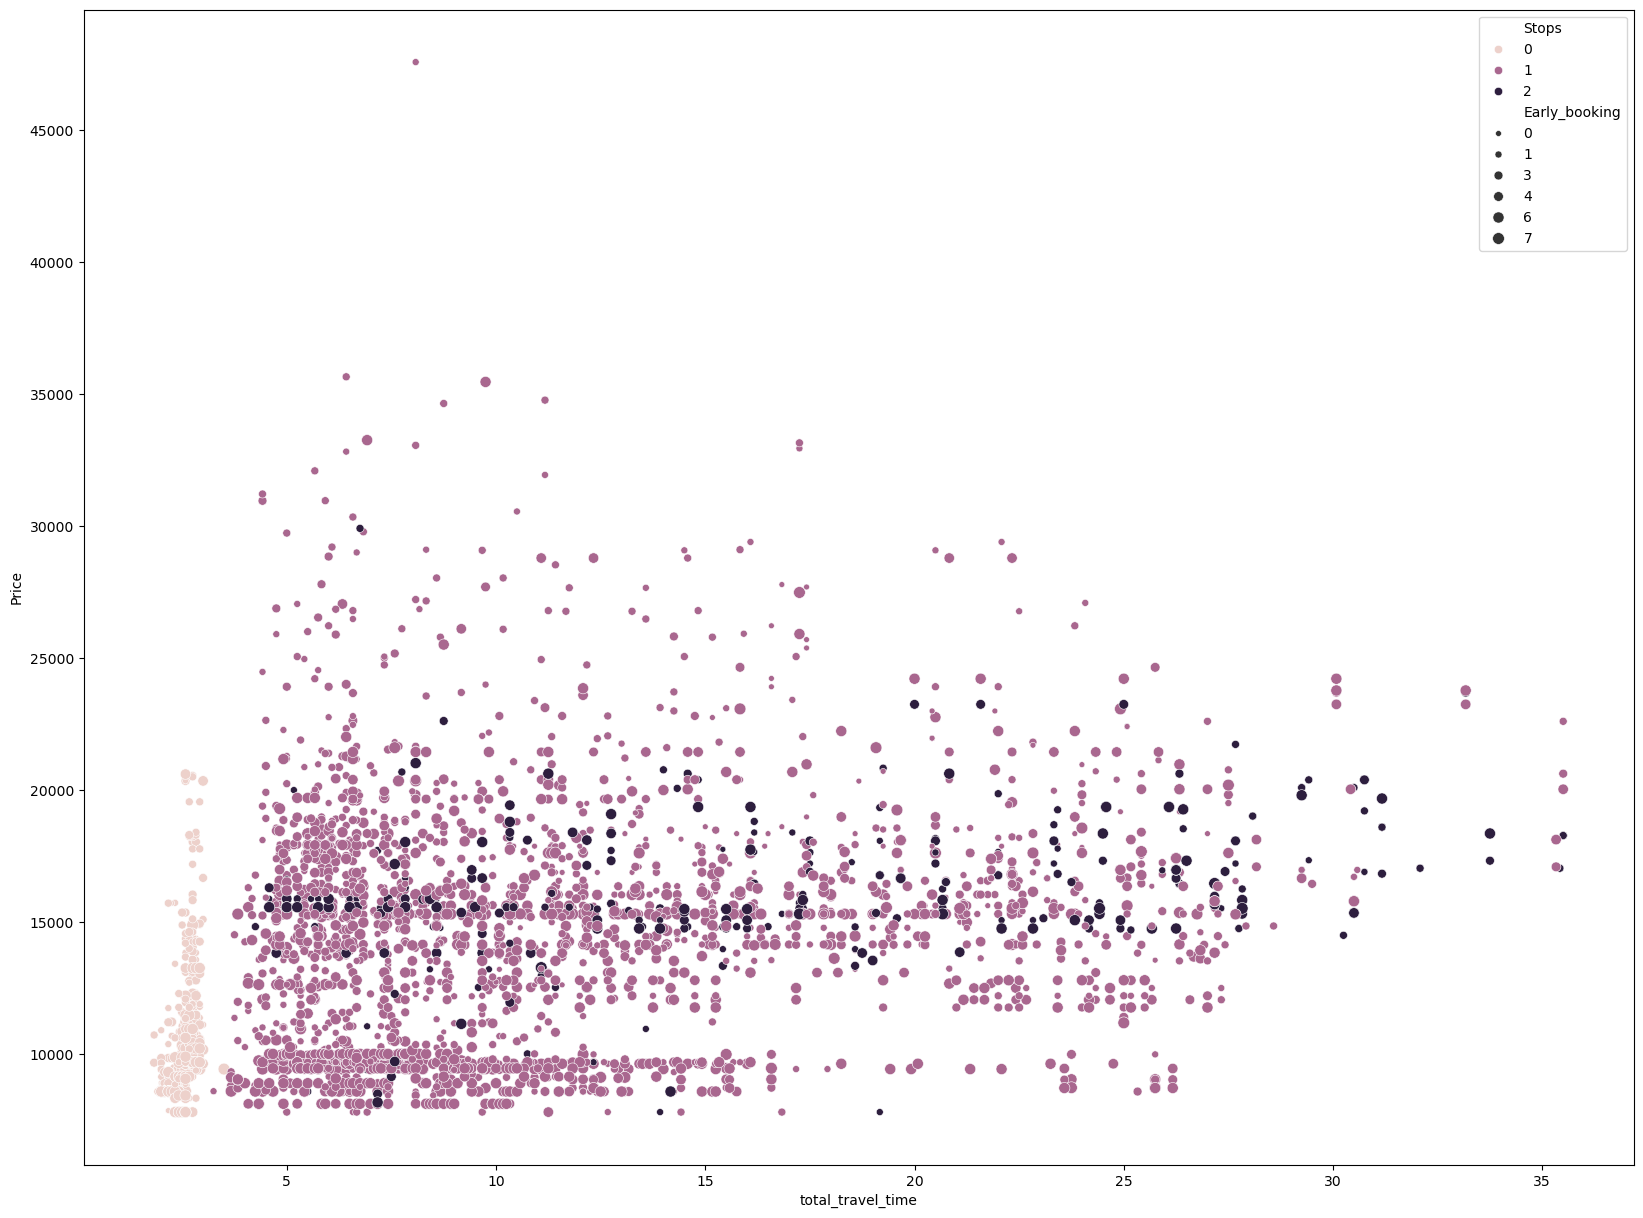

In [72]:
plt.figure(figsize=(20,15))
sns.scatterplot(df,x='total_travel_time', y='Price', hue='Stops', size='Early_booking')
plt.show()

In [73]:
df.head(2)

,From,To,Booking_date,Journey_date,Airline,Code,Departure,Arrival,Stops,Price,Traveling_cities,Early_booking,total_travel_time
0,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-504,night_departure,Early_morning_arrival,0,9420,Delhi-Bangalore,0,2.83
1,Delhi,Bangalore,2022-06-23,2022-06-23,IndiGo,6E-2131,night_departure,Early_morning_arrival,0,9419,Delhi-Bangalore,0,2.75


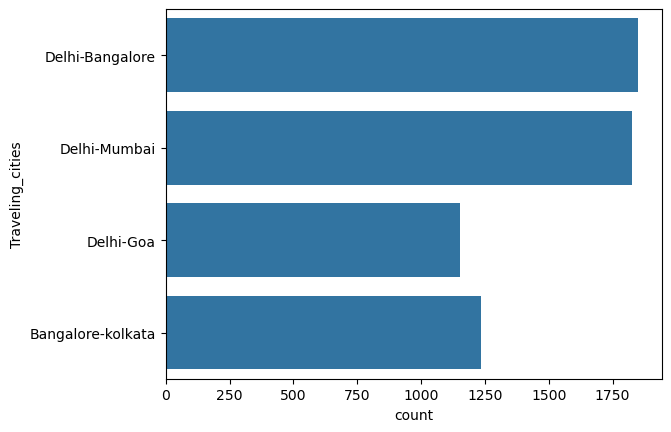

In [74]:
sns.countplot(df['Traveling_cities'])
plt.show()

In [75]:
df.groupby('Traveling_cities')['Price'].mean()

Traveling_cities
Bangalore-kolkata    13314.224110
Delhi-Bangalore      13380.058919
Delhi-Goa            12909.355035
Delhi-Mumbai         11917.739583
Name: Price, dtype: float64

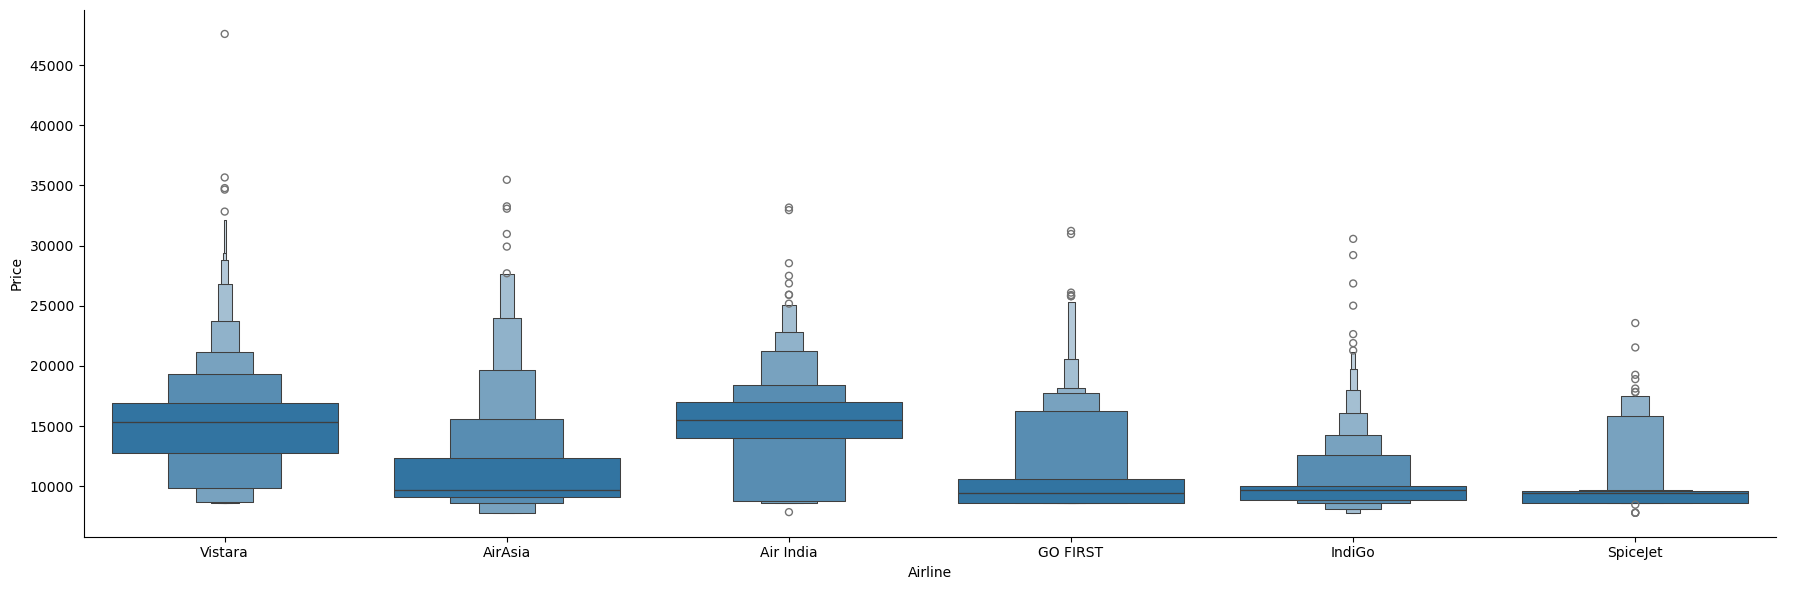

In [76]:
sns.catplot(y="Price",x="Airline",data=df.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

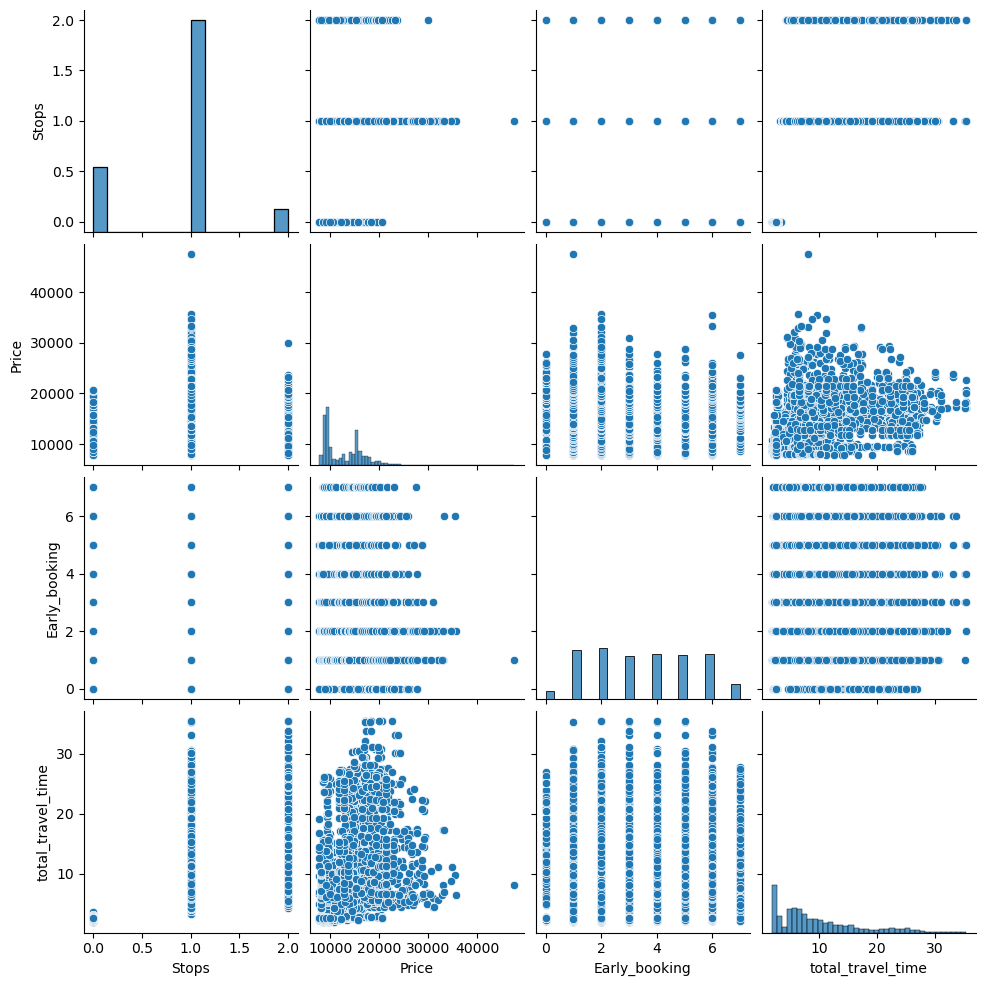

In [77]:
sns.pairplot(df)


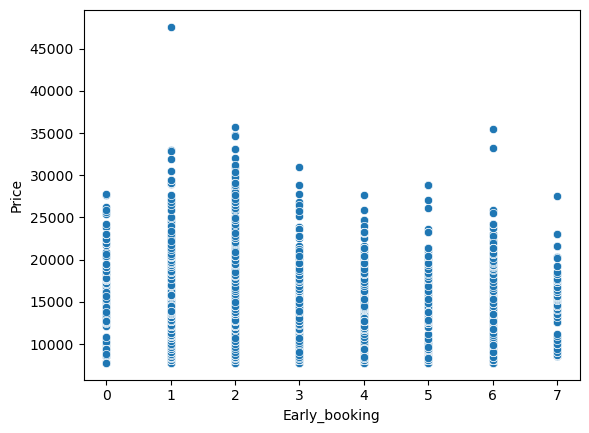

In [78]:
sns.scatterplot(df,x='Early_booking',y='Price')
plt.show()

In [79]:
df.head()

,From,To,Booking_date,Journey_date,Airline,Code,Departure,Arrival,Stops,Price,Traveling_cities,Early_booking,total_travel_time
0,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-504,night_departure,Early_morning_arrival,0,9420,Delhi-Bangalore,0,2.83
1,Delhi,Bangalore,2022-06-23,2022-06-23,IndiGo,6E-2131,night_departure,Early_morning_arrival,0,9419,Delhi-Bangalore,0,2.75
2,Delhi,Bangalore,2022-06-23,2022-06-23,IndiGo,6E-6565,night_departure,Early_morning_arrival,0,9419,Delhi-Bangalore,0,2.83
3,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-605,night_departure,morning_arrival,1,14775,Delhi-Bangalore,0,10.58
4,Delhi,Bangalore,2022-06-23,2022-06-23,Air India,AI-605,night_departure,evening_arrival,1,14985,Delhi-Bangalore,0,21.08


In [80]:
# From and To feature are no more required as we have extracted Traveling_cities feature which have both to-from name

# Booking_date and journey date is not required as we have calculated how many days before ticket booked before travel


df=df.drop(['From','To','Booking_date','Journey_date'], axis=1)

In [81]:
df.head(2)

,Airline,Code,Departure,Arrival,Stops,Price,Traveling_cities,Early_booking,total_travel_time
0,Air India,AI-504,night_departure,Early_morning_arrival,0,9420,Delhi-Bangalore,0,2.83
1,IndiGo,6E-2131,night_departure,Early_morning_arrival,0,9419,Delhi-Bangalore,0,2.75


In [82]:
df['Code'].nunique()

585

In [83]:
df=df.drop('Code', axis=1)

In [84]:
df.head()

,Airline,Departure,Arrival,Stops,Price,Traveling_cities,Early_booking,total_travel_time
0,Air India,night_departure,Early_morning_arrival,0,9420,Delhi-Bangalore,0,2.83
1,IndiGo,night_departure,Early_morning_arrival,0,9419,Delhi-Bangalore,0,2.75
2,IndiGo,night_departure,Early_morning_arrival,0,9419,Delhi-Bangalore,0,2.83
3,Air India,night_departure,morning_arrival,1,14775,Delhi-Bangalore,0,10.58
4,Air India,night_departure,evening_arrival,1,14985,Delhi-Bangalore,0,21.08


<Axes: xlabel='total_travel_time', ylabel='Density'>

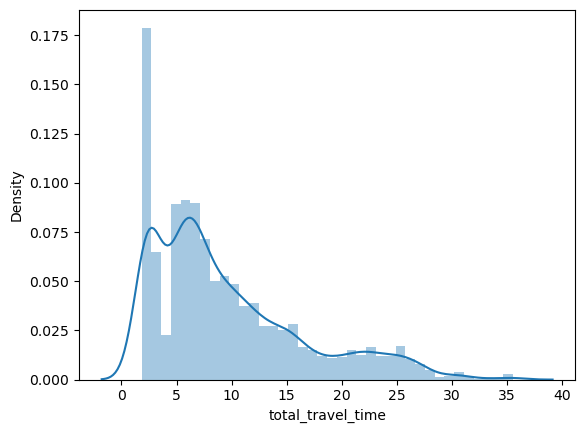

In [85]:
sns.distplot(df['total_travel_time'])

In [86]:
catg_features=[col for col in df.columns if df[col].dtypes=='object']
cont_features=[col for col in df.columns if df[col].dtypes!='object']

<Axes: >

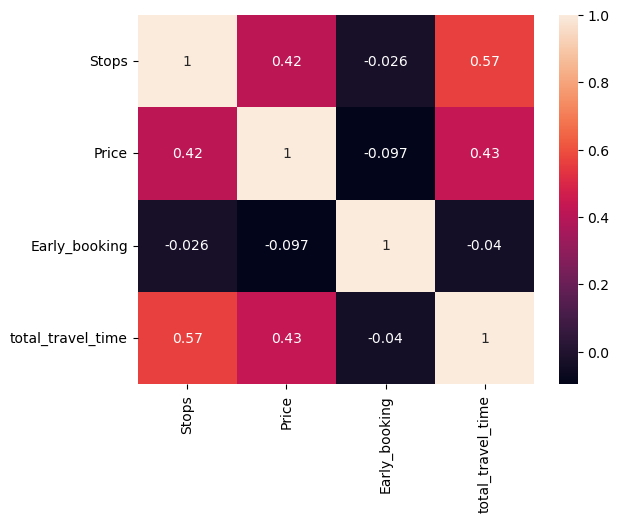

In [87]:
sns.heatmap(df.corr(numeric_only=cont_features), annot=True)

In [88]:
df.skew(numeric_only=cont_features)

Stops               -0.159315
Price                1.168514
Early_booking        0.072079
total_travel_time    1.152422
dtype: float64

### Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend to go up or down over time?

In [89]:
df.head(2)

,Airline,Departure,Arrival,Stops,Price,Traveling_cities,Early_booking,total_travel_time
0,Air India,night_departure,Early_morning_arrival,0,9420,Delhi-Bangalore,0,2.83
1,IndiGo,night_departure,Early_morning_arrival,0,9419,Delhi-Bangalore,0,2.75


<Axes: xlabel='Early_booking', ylabel='Price'>

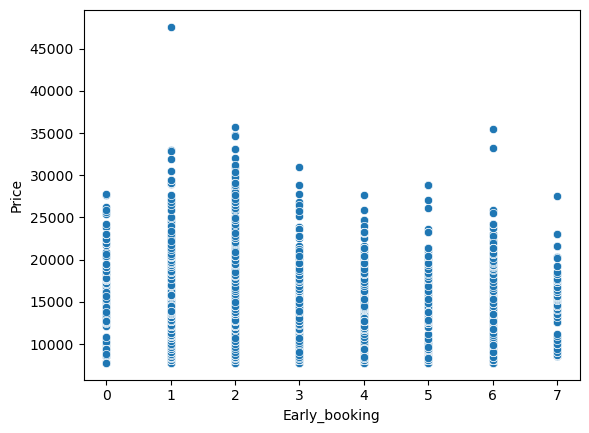

In [90]:
sns.scatterplot(df,x='Early_booking',y='Price')

### What is the best time to buy so that the consumer can save the most by taking the least risk?

In [91]:
df.groupby('Early_booking')['Price'].median().sort_values()

Early_booking
5     9994.0
6    10130.0
4    10199.5
1    11753.0
3    11753.0
2    13769.0
7    14140.0
0    15720.0
Name: Price, dtype: float64

In [92]:
df.groupby('Departure')['Price'].median().sort_values()

Departure
late_night_departure        9447.0
Early_morning_departure     9679.0
night_departure            11753.0
evening_departure          12046.0
morning_departure          12490.0
afternoon_departure        12640.5
Name: Price, dtype: float64

In [93]:
df.groupby('Arrival')['Price'].median().sort_values()

Arrival
Early_morning_arrival     9679.0
late_night_arrival        9994.0
night_arrival            10572.5
morning_arrival          12046.0
afternoon_arrival        13584.0
evening_arrival          13769.0
Name: Price, dtype: float64

Best time to buy ticket is approx 5-6 days before travel date. Late_night and early_morning departure and arrival flights are less expensive

### Does price increase as we get near to departure date? Is Indigo cheaper than Air India? Are morning flights expensive?

In [94]:
df.groupby('Early_booking')['Price'].mean()

Early_booking
0    15318.156863
1    12861.460843
2    13854.391431
3    12717.087659
4    12350.076923
5    12213.422520
6    12445.065574
7    12895.323232
Name: Price, dtype: float64

Is Indigo cheaper than Air India?

In [95]:
df.groupby('Airline')['Price'].mean()

Airline
Air India    15165.786026
AirAsia      11551.761155
GO FIRST     10961.345876
IndiGo       10140.129271
SpiceJet      9828.076233
Vistara      15236.919311
Name: Price, dtype: float64

Indigo average price is 10140 while Air India average price is 15165
Yes, Indigo is cheaper than Air India

Are morning flights expensive?

In [96]:
df.groupby('Departure')['Price'].median().sort_values(ascending=False)

Departure
afternoon_departure        12640.5
morning_departure          12490.0
evening_departure          12046.0
night_departure            11753.0
Early_morning_departure     9679.0
late_night_departure        9447.0
Name: Price, dtype: float64

In [97]:
df.groupby('Arrival')['Price'].median().sort_values(ascending=False)

Arrival
evening_arrival          13769.0
afternoon_arrival        13584.0
morning_arrival          12046.0
night_arrival            10572.5
late_night_arrival        9994.0
Early_morning_arrival     9679.0
Name: Price, dtype: float64

#

# Seprate X and Y

In [98]:
X= df.drop('Price', axis=1)
Y=df['Price']

In [99]:
X.shape  , Y.shape

((6062, 7), (6062,))

In [100]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [101]:
encode = OneHotEncoder()

In [102]:
encode.fit_transform(X[['Airline','Departure','Arrival','Traveling_cities']])

<6062x22 sparse matrix of type '<class 'numpy.float64'>'
	with 24248 stored elements in Compressed Sparse Row format>

In [103]:
col_transform = make_column_transformer((OneHotEncoder(categories=encode.categories_),['Airline','Departure','Arrival','Traveling_cities']),remainder='passthrough')

In [104]:
transformers=ColumnTransformer(transformers=[('tnf1',StandardScaler(),['total_travel_time']),('tnf2',OneHotEncoder(sparse_output=False,drop='first'),['Airline','Departure','Arrival','Traveling_cities'])],remainder='passthrough')

In [105]:
X=transformers.fit_transform(X)

In [106]:
X.shape

(6062, 21)

# Machine Learning

In [107]:
# Its a Regression problem coz output variable have continuous data, sales prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

LR= LinearRegression()

In [108]:
# Train Test Split / finding best random_state for my model

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.2)
    LR.fit(x_train,y_train)
    train_pred=LR.predict(x_train)
    test_pred=LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2)==round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('X'*50,'\n')

At random state  74 The model performance very well
At random state:  74
Test R2 score is:  0.44
Train R2 score is:  0.44
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  93 The model performance very well
At random state:  93
Test R2 score is:  0.44
Train R2 score is:  0.44
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  161 The model performance very well
At random state:  161
Test R2 score is:  0.44
Train R2 score is:  0.44
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 



In [109]:
# Select Random state= 44

x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=44,test_size=.3)
LR.fit(x_train,y_train)

LinearRegression()

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [111]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [112]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , np.sqrt(mean_squared_error(y_test,m.predict(x_test))))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print('X' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 2266.795618170196
mean_square_error of LinearRegression() model 3196.8622715102224
R2 Score of LinearRegression() model 43.53832928327681
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Ridge() model 2265.923482172717
mean_square_error of Ridge() model 3195.727954393268
R2 Score of Ridge() model 43.578389862520694
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Lasso() model 2264.715495227859
mean_square_error of Lasso() model 3195.2404419871073
R2 Score of Lasso() model 43.59560292774677
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  DecisionTreeRegressor() model 1589.6722558182153
mean_square_error of DecisionTreeRegressor() model 3260.6467571373773
R2 Score of DecisionTreeRegressor() model 41.26278153865949
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  SVR() model 3435.519938515759
mean_square_error of SVR() model

## Random FOrest Regressor

In [113]:
from sklearn.ensemble import RandomForestRegressor
rgf_rf=RandomForestRegressor()
rgf_rf.fit(x_train,y_train)

RandomForestRegressor()

In [114]:
y_pred=rgf_rf.predict(x_test)

In [115]:
rgf_rf.score(x_train,y_train)

0.9408426420123548

In [116]:
rgf_rf.score(x_test,y_test)

0.6233811394573219

<Axes: xlabel='Price', ylabel='Density'>

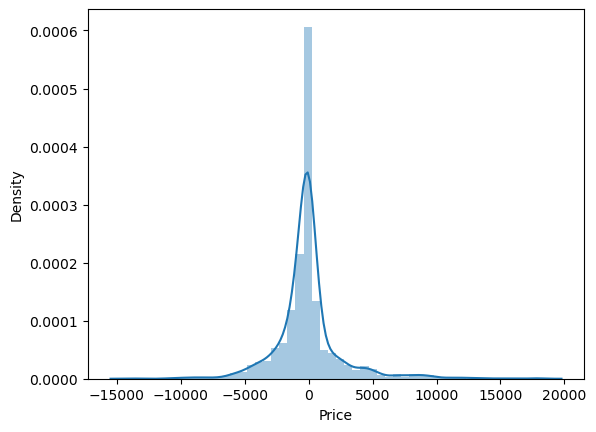

In [117]:
sns.distplot(y_test-y_pred)

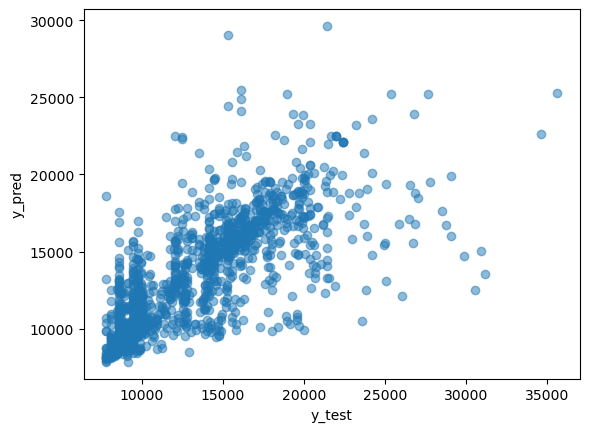

In [118]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [119]:
mean_absolute_error(y_test,y_pred)

1467.5829553216922

In [120]:
np.sqrt(mean_squared_error(y_test,y_pred))

2610.947241772627

In [121]:
r2_score(y_test,y_pred)

0.6233811394573219

### Hypertuning

In [122]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [123]:
rgf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [124]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=["auto","sqrt"]
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [125]:
random_grid={
    "n_estimators":n_estimators,
     "max_features":max_features,
     "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf
}

In [126]:
RSCV = RandomizedSearchCV(rgf_rf,random_grid,cv=5,scoring="neg_mean_squared_error",random_state=42,n_jobs=1)

In [127]:
RSCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [128]:
RSCV.best_estimator_

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [129]:
RSCV.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [130]:
pred = RSCV.best_estimator_.predict(x_test)

In [131]:
print('mean_squared_error := ',mean_squared_error(pred,y_test))
print('mean_absolute_error := ',mean_absolute_error(pred,y_test))
print('r2_score := ',r2_score(pred,y_test))

mean_squared_error :=  6937765.183149401
mean_absolute_error :=  1480.0892011608976
r2_score :=  0.43973627618063293


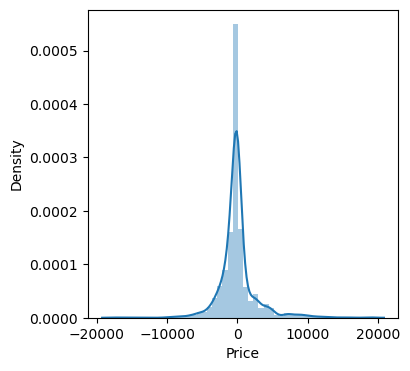

In [132]:
plt.figure(figsize=(4,4))
sns.distplot(y_test-pred)
plt.show()

## Save the Model

In [133]:
import joblib
joblib.dump(RFR_model,"flight_price_Prediction.pkl")

['flight_price_Prediction.pkl']